In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [31]:
datasets = ['lasry', 'vangalen', 'simillie']
tools = ['nn', 'cpdb', 'community', 'CellChat']

In [32]:
# Function to read a single data file
def read_data(file_path):
    
    data = pd.read_csv(file_path, index_col=False)
    return data

In [33]:
# (case,control)
original_dataset = {"vangalen":(24,9),"lasry": (7,6), "simillie":(17,11)}

In [34]:
# Loop through each tool and dataset to read the files and get peak values

peak_values = {'Tool': [], 'Dataset': [], 'Number_of_case':[], 'Number_of_control':[], "Number of Samples": [], 'Peak_CPU': [], 'Peak_RAM_MB': [], 'Peak_VRAM_MB': [],'Elapsed_time(min)':[]}

for tool in tools:
    for dataset in datasets:
        for file_name in os.listdir(f'./{tool}/'):  # Replace with actual path
            if dataset in file_name:
                # Parse number of case and control from file name
                
                if "full" in file_name:
                    num_case, num_control = original_dataset[dataset]
                else:
                    _, num_case, num_control = file_name.replace('txt', '').split('_')[1:]
                    num_control = num_control.split('.')[0]
                # Read the data
                data = read_data(f'./{tool}/{file_name}') 
                
                num_case = int(num_case)
                num_control = int(num_control)
                
                # Append peak values to the dictionary
                peak_values['Tool'].append(tool)
                peak_values['Dataset'].append(dataset)
                peak_values['Number_of_case'].append(num_case)
                peak_values['Number_of_control'].append(num_control)
                peak_values["Number of Samples"].append(num_case + num_control)
                peak_values['Peak_CPU'].append(data['CPU'].max())
                peak_values['Peak_RAM_MB'].append(data['Real_MB'].max())
                peak_values['Peak_VRAM_MB'].append(data['Virtual_MB'].max())
                peak_values['Elapsed_time(min)'].append(data['Elapsed_time'].max()/60)

In [35]:
file_name.replace('csv.gz.txt', '').split('_')[1:]

['vangalen', '9', '10.']

In [36]:
tool

'CellChat'

In [37]:
file_name

'activity_vangalen_9_10.csv.gz.txt'

In [38]:
peak_values = pd.DataFrame(peak_values)

In [39]:
tool_names = {"nn": "NicheNet",
             "cpdb": "CellPhoneDB",}

dataset_names = {"lasry":"Lasry",
                "simillie": "Simillie",
                "vangalen":"VanGalen"}

In [40]:
peak_values = peak_values.replace({"Tool": tool_names, "Dataset":dataset_names})

In [41]:
# Define a set of markers and colors for the tools
markers = ['o', 'D', 'X']
palette = {'NicheNet': '#cdad00', 'community': '#6e8b3d', 'CellPhoneDB': '#8b8878', 'CellChat': '#4682b4'}

In [42]:
palette_dataset = {'Lasry': '#cdad00', 'Simillie': '#6e8b3d', 'VanGalen': '#8b8878'}

In [43]:
peak_values

,Tool,Dataset,Number_of_case,Number_of_control,Number of Samples,Peak_CPU,Peak_RAM_MB,Peak_VRAM_MB,Elapsed_time(min)
0,NicheNet,Lasry,3,3,6,101.3,11783.340,23080.527,27.409483
1,NicheNet,Lasry,7,6,13,101.3,19322.066,32142.621,56.846283
2,NicheNet,VanGalen,24,9,33,102.0,50986.441,63893.312,621.694067
3,NicheNet,VanGalen,7,6,13,101.3,24174.445,35262.977,161.627500
4,NicheNet,VanGalen,3,3,6,101.5,6578.918,17520.691,113.078367
5,NicheNet,VanGalen,9,10,19,101.9,23660.816,35383.059,343.564700
6,NicheNet,Simillie,3,3,6,101.3,9182.527,20650.570,23.295600
7,NicheNet,Simillie,10,12,22,101.3,25720.246,39708.168,81.617383
8,NicheNet,Simillie,7,6,13,101.3,14101.961,25872.832,45.180700
9,NicheNet,Simillie,17,11,28,101.4,32338.512,46906.734,215.051000


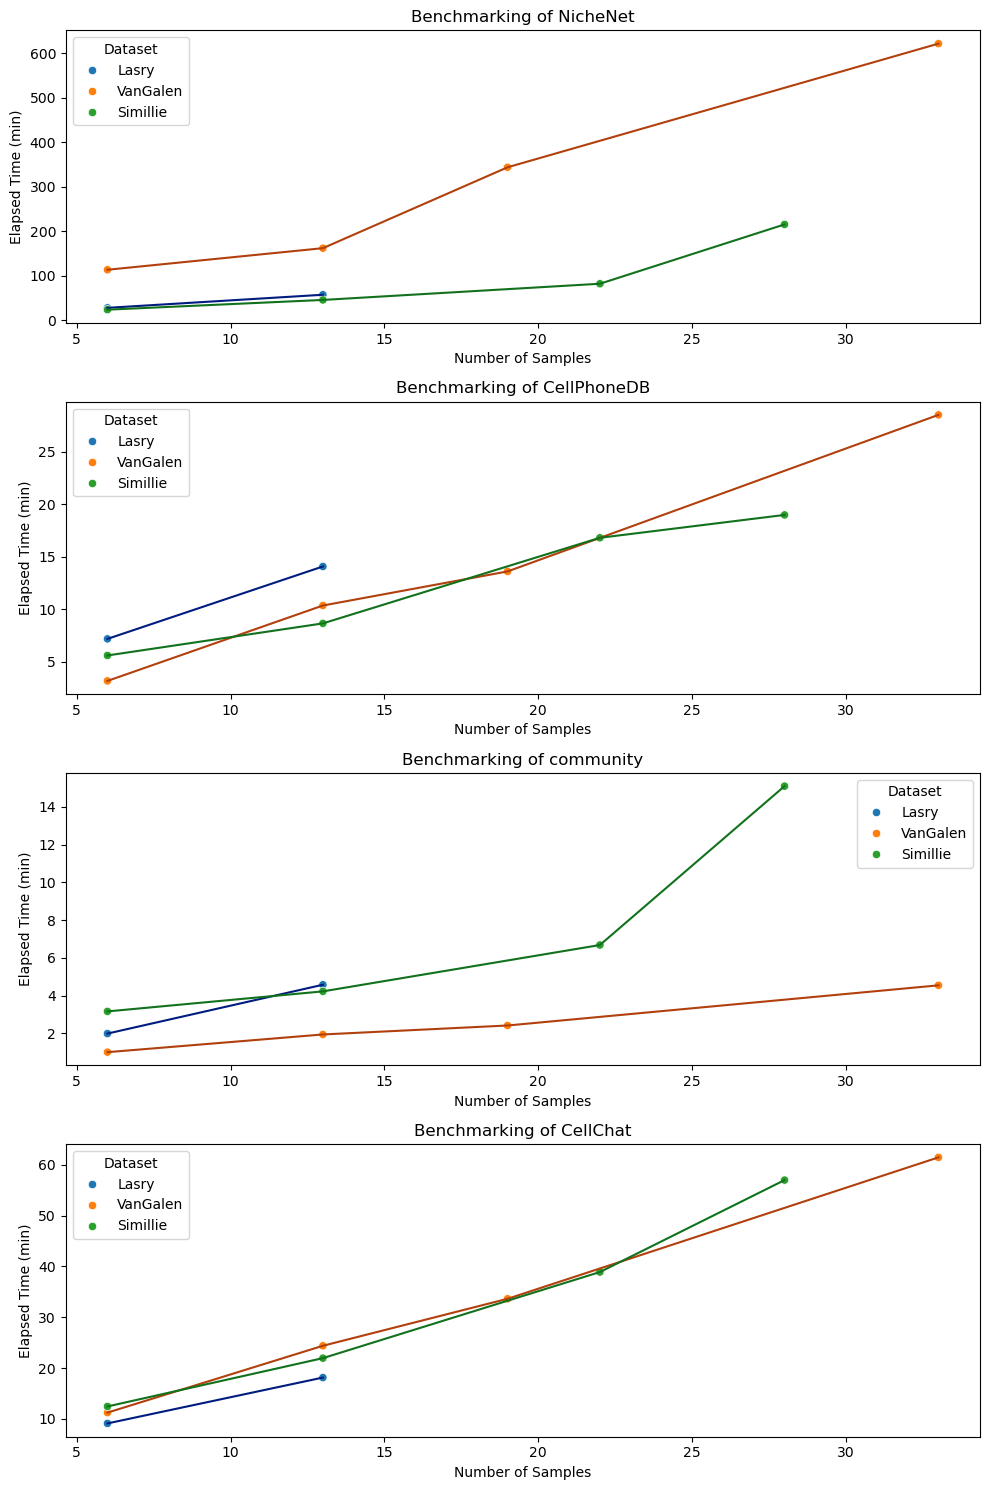

In [44]:
# Let's create separate plots for each tool, focusing on "Number of Samples" and "Elapsed_time(min)"
tools = peak_values['Tool'].unique()

# Create subplots
fig, axes = plt.subplots(len(tools), 1, figsize=(10, 15))

# Loop through each tool to create a separate plot
for i, tool in enumerate(tools):
    sns.scatterplot(data=peak_values[peak_values['Tool'] == tool], x="Number of Samples", y="Elapsed_time(min)", 
                    hue="Dataset", ax=axes[i], palette="tab10")
    
    
    sns.lineplot(peak_values[peak_values['Tool'] == tool], x="Number of Samples", y="Elapsed_time(min)", 
                 hue="Dataset", ax=axes[i], palette="dark", dashes=False ,legend=False)
    axes[i].set_title(f"Benchmarking of {tool}")
    axes[i].set_xlabel("Number of Samples")
    axes[i].set_ylabel("Elapsed Time (min)")

# Adjust layout
plt.tight_layout()
plt.show()


In [45]:
peak_values["Elapsed_hour"] = peak_values["Elapsed_time(min)"] / 60

In [46]:
palette

{'NicheNet': '#cdad00',
 'community': '#6e8b3d',
 'CellPhoneDB': '#8b8878',
 'CellChat': '#4682b4'}

In [18]:
# # Set font and font size
# plt.rcParams['font.family'] = 'Arial'
# # plt.rcParams['font.family'] = 'sans-serif' 
# plt.rcParams['font.size'] = 11

In [19]:
# import imp
# >>> imp.find_module('matplotlib')

(None,
 '/home/mami/.local/lib/python3.10/site-packages/matplotlib',
 ('', '', 5))

In [20]:
# import matplotlib.font_manager as fm
# font_path = '/home/mami/Downloads/HelveticaNeue.ttf'  # the location of the font file
# my_font = fm.FontProperties(fname=font_path)

In [47]:
custom_order = ['community', 'NicheNet', 'CellPhoneDB', 'CellChat']

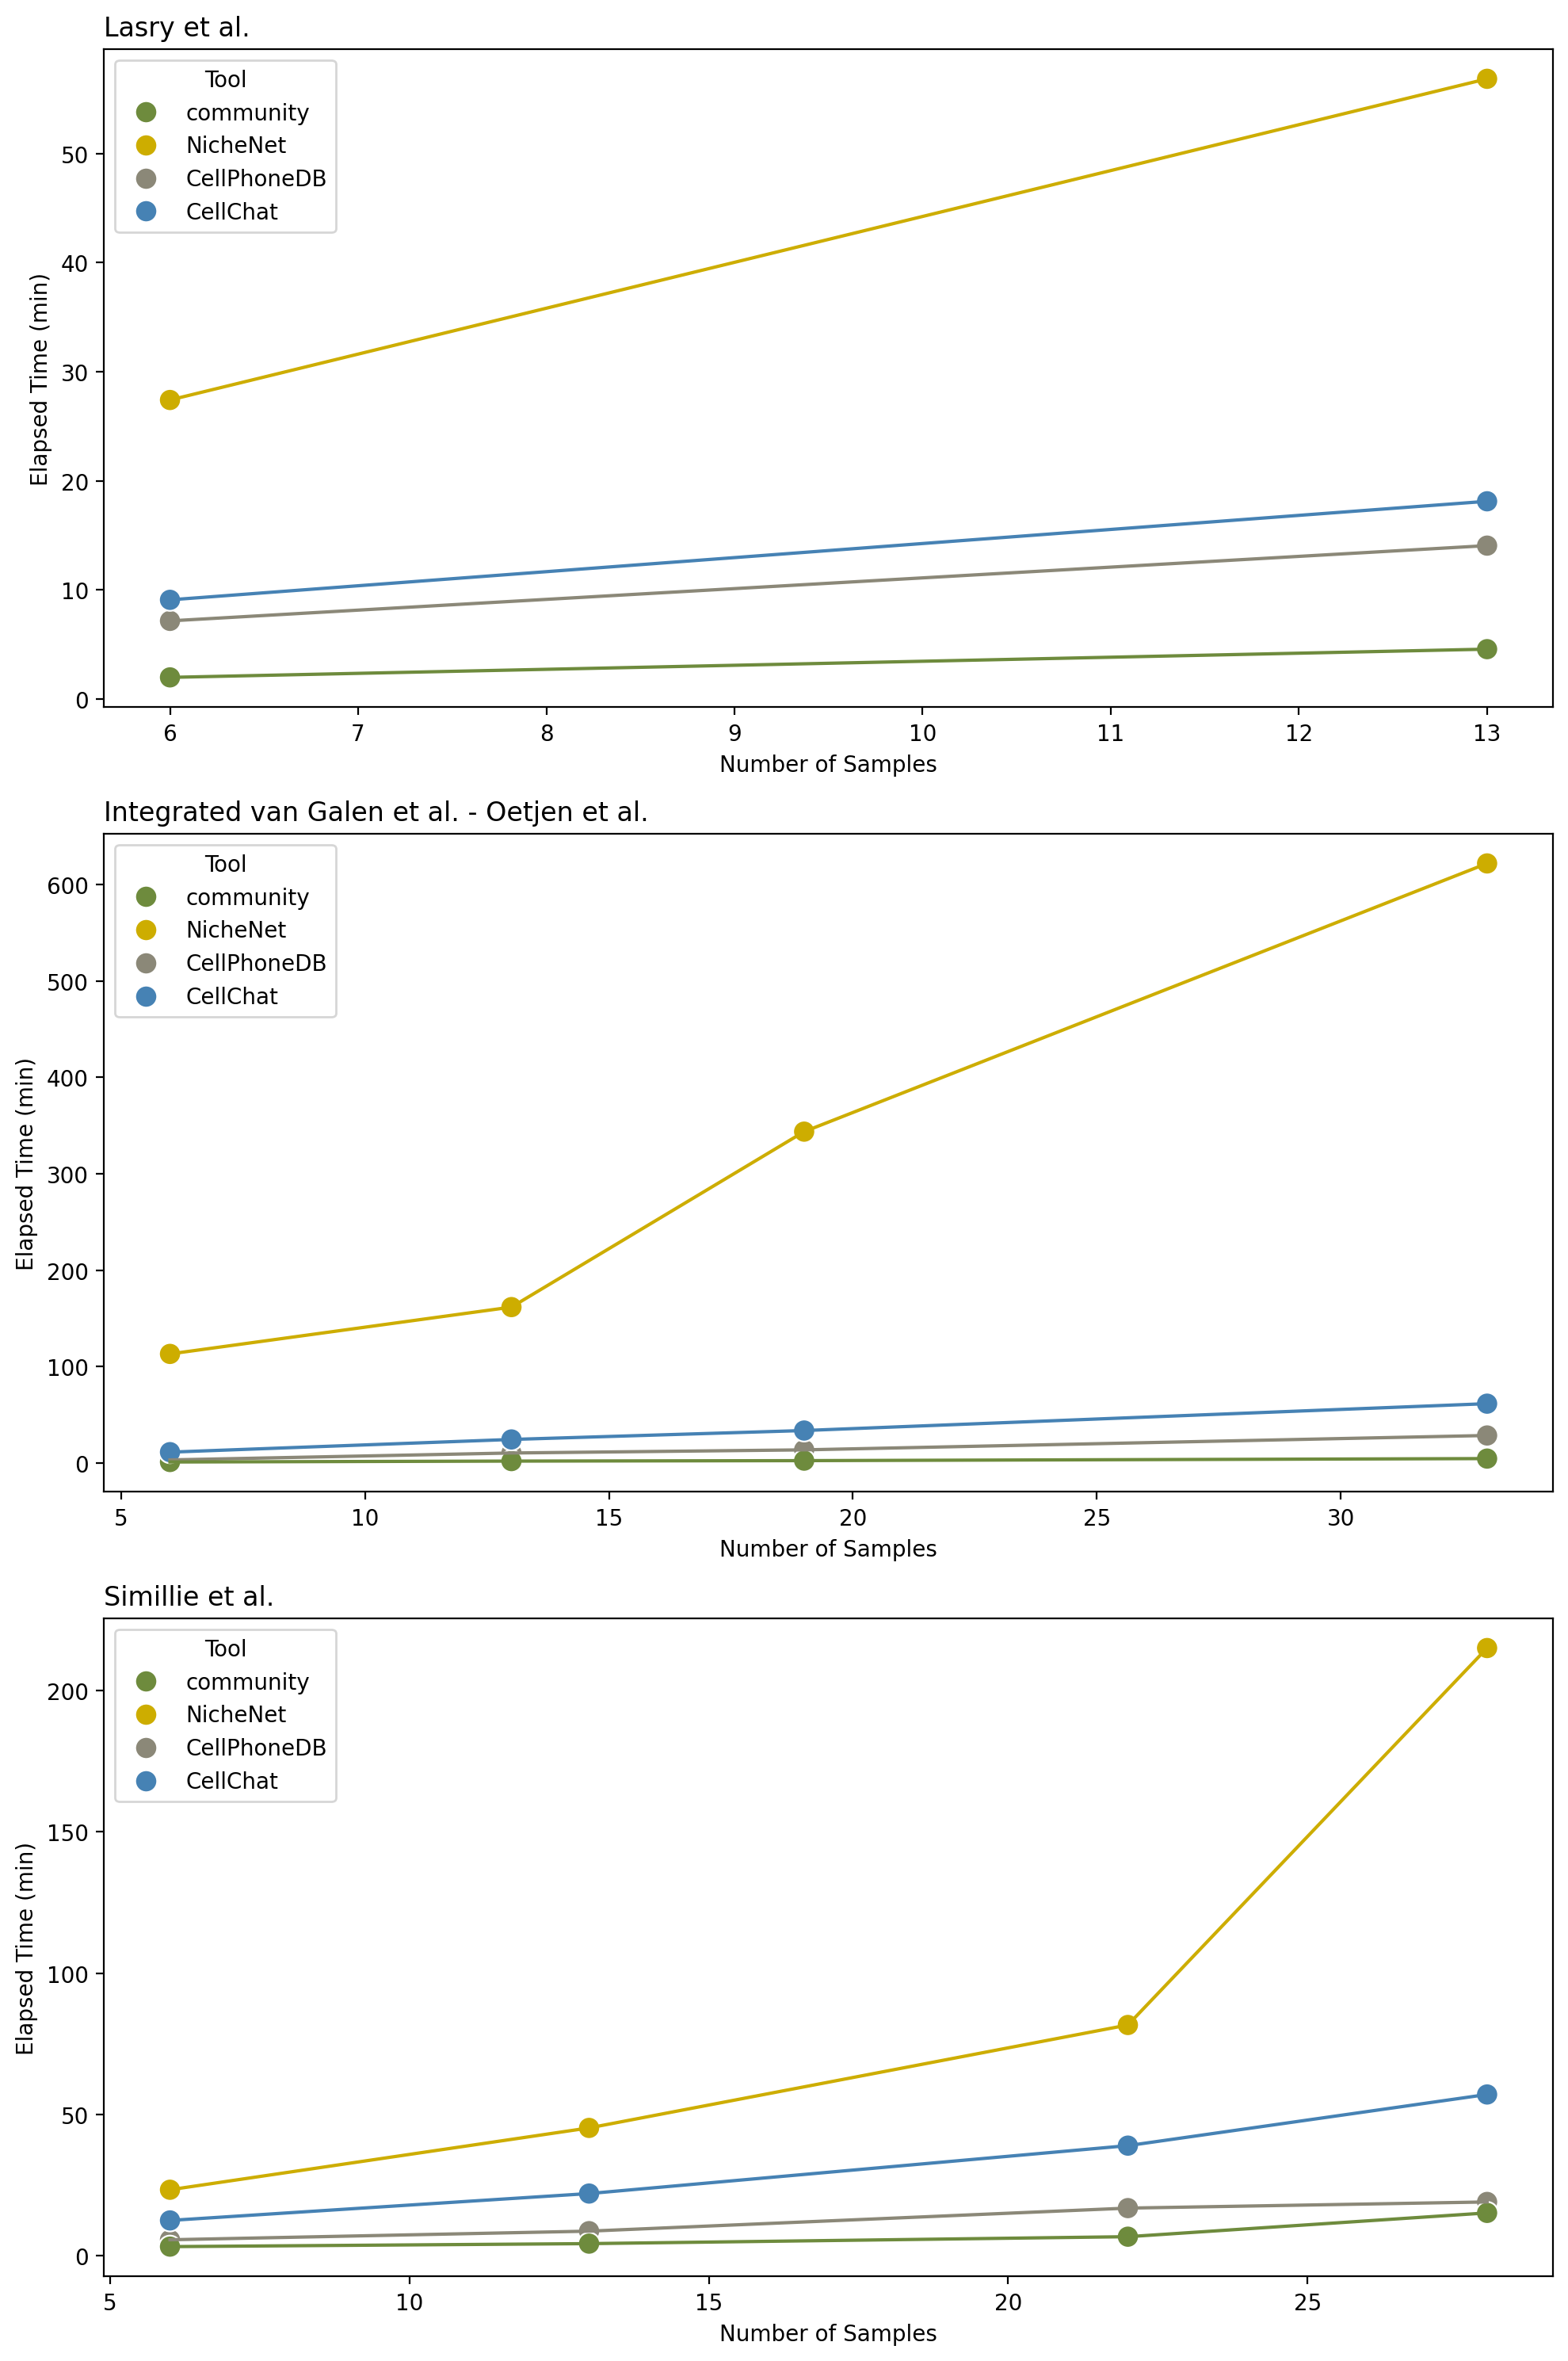

In [48]:
datasets = peak_values['Dataset'].unique()

# Create subplots
fig, axes = plt.subplots(len(datasets), 1, figsize=(10, 15), dpi=200)

# Loop through each tool to create a separate plot
for i, dataset in enumerate(datasets):
    sns.scatterplot(data=peak_values[peak_values['Dataset'] == dataset], x="Number of Samples", y="Elapsed_time(min)", 
                    hue="Tool", hue_order=custom_order, ax=axes[i], palette=palette, s=100)
    
    
    sns.lineplot(peak_values[peak_values['Dataset'] == dataset], x="Number of Samples", y="Elapsed_time(min)", 
                 hue="Tool", ax=axes[i], palette=palette, dashes=False ,legend=False)
    
    
    if dataset == "Lasry":
        title = "Lasry et al."
    elif dataset == "Simillie":
        title = "Simillie et al."
    else:
        title = "Integrated van Galen et al. - Oetjen et al."
    
    
    axes[i].set_title(title, loc='left')
    axes[i].set_xlabel("Number of Samples")
    axes[i].set_ylabel("Elapsed Time (min)")

# Adjust layout
plt.tight_layout()
plt.show()


In [49]:
# # Create subplots for log-scaled plots
# fig, axes = plt.subplots(len(tools), 1, figsize=(10, 15))

# # Loop through each tool to create a separate plot with log10-scaled y-axis
# for i, dataset in enumerate(datasets):
    
#     sns.scatterplot(data=peak_values[peak_values['Dataset'] == dataset], x="Number of Samples", y="Elapsed_time(min)", 
#                     hue="Tool", ax=axes[i], palette="tab10")
    
    
#     sns.lineplot(data=peak_values[peak_values['Dataset'] == dataset], x="Number of Samples", y="Elapsed_time(min)", 
#                  hue="Tool", ax=axes[i], palette="dark", dashes=False, legend=False)
    
#     axes[i].set_yscale("log")
#     axes[i].set_title(f"Benchmarking of {dataset} (Log10-scaled Time)")
#     axes[i].set_xlabel("Number of Samples")
#     axes[i].set_ylabel("Log10(Elapsed Time) (min)")

# # Adjust layout
# plt.tight_layout()
# plt.show()

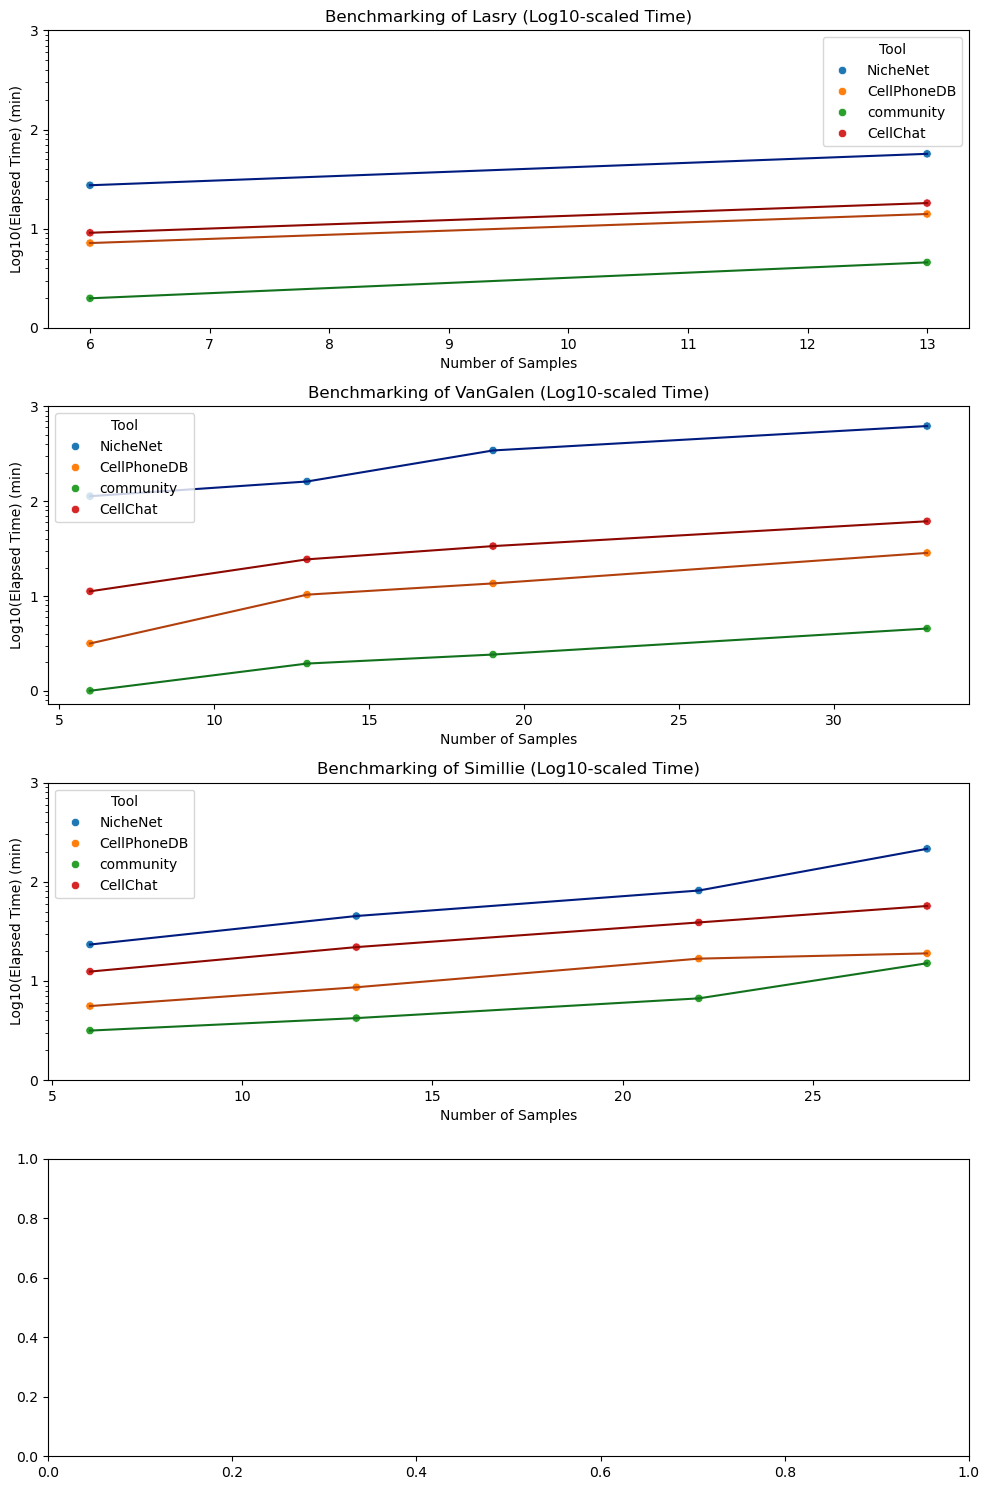

In [50]:
# Create subplots for log-scaled plots
fig, axes = plt.subplots(len(tools), 1, figsize=(10, 15))

# Loop through each tool to create a separate plot with log10-scaled y-axis
for i, dataset in enumerate(datasets):
    sns.scatterplot(data=peak_values[peak_values['Dataset'] == dataset], x="Number of Samples", y="Elapsed_time(min)", 
                    hue="Tool", ax=axes[i], palette="tab10")
    
    
    sns.lineplot(data=peak_values[peak_values['Dataset'] == dataset], x="Number of Samples", y="Elapsed_time(min)", 
                 hue="Tool", ax=axes[i], palette="dark", dashes=False, legend=False)
    axes[i].set_yscale("log")
    axes[i].set_yticks([1, 10, 100, 1000])
    axes[i].get_yaxis().set_major_formatter(lambda x, _: '{:.0f}'.format(np.log10(x)))
    axes[i].set_title(f"Benchmarking of {dataset} (Log10-scaled Time)")
    axes[i].set_xlabel("Number of Samples")
    axes[i].set_ylabel("Log10(Elapsed Time) (min)")

# Adjust layout
plt.tight_layout()
plt.show()

In [24]:
# peak_values.to_csv("peak_values_table.csv")

In [51]:
peak_values.head()

,Tool,Dataset,Number_of_case,Number_of_control,Number of Samples,Peak_CPU,Peak_RAM_MB,Peak_VRAM_MB,Elapsed_time(min),Elapsed_hour
0,NicheNet,Lasry,3,3,6,101.3,11783.340,23080.527,27.409483,0.456825
1,NicheNet,Lasry,7,6,13,101.3,19322.066,32142.621,56.846283,0.947438
2,NicheNet,VanGalen,24,9,33,102.0,50986.441,63893.312,621.694067,10.361568
3,NicheNet,VanGalen,7,6,13,101.3,24174.445,35262.977,161.627500,2.693792
4,NicheNet,VanGalen,3,3,6,101.5,6578.918,17520.691,113.078367,1.884639


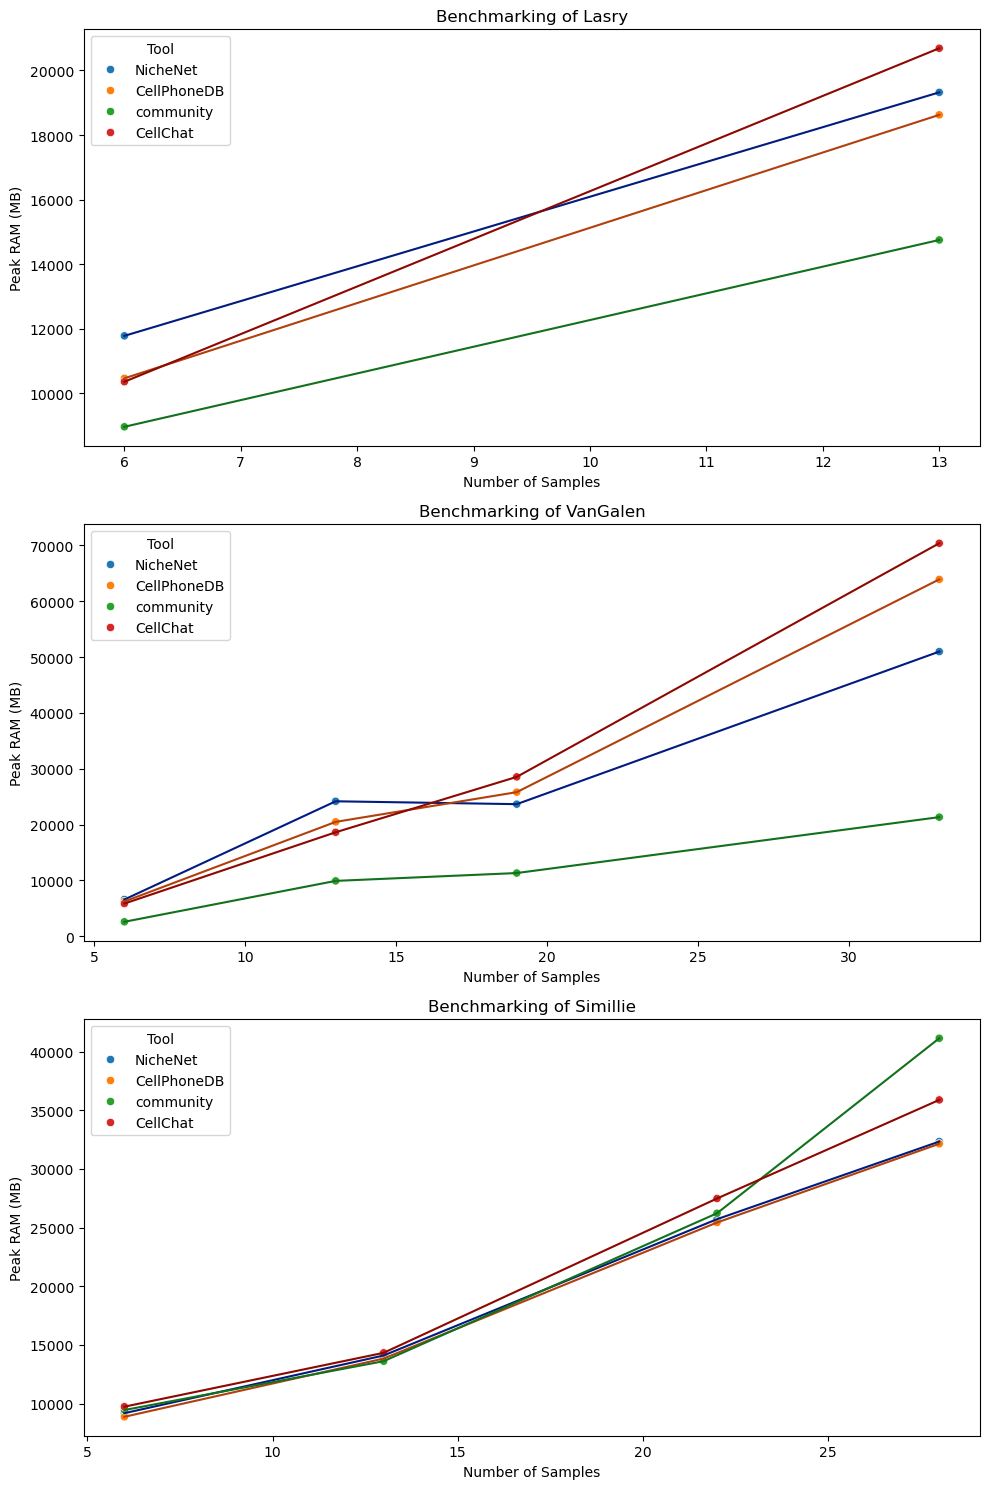

In [52]:
datasets = peak_values['Dataset'].unique()

# Create subplots
fig, axes = plt.subplots(len(datasets), 1, figsize=(10, 15))

# Loop through each tool to create a separate plot
for i, dataset in enumerate(datasets):
    sns.scatterplot(data=peak_values[peak_values['Dataset'] == dataset], x="Number of Samples", y="Peak_RAM_MB", 
                    hue="Tool", ax=axes[i], palette="tab10")
    
    
    sns.lineplot(peak_values[peak_values['Dataset'] == dataset], x="Number of Samples", y="Peak_RAM_MB", 
                 hue="Tool", ax=axes[i], palette="dark", dashes=False ,legend=False)
    axes[i].set_title(f"Benchmarking of {dataset}")
    axes[i].set_xlabel("Number of Samples")
    axes[i].set_ylabel("Peak RAM (MB)")

# Adjust layout
plt.tight_layout()
plt.show()


In [53]:
df_highest_samples_tool_dataset = peak_values.loc[peak_values.groupby(['Tool', 'Dataset'])['Number of Samples'].idxmax()]

# df_highest_samples = peak_values.loc[peak_values.groupby('Dataset')['Number of Samples'].idxmax()]

In [54]:
df_highest_samples_tool_dataset

,Tool,Dataset,Number_of_case,Number_of_control,Number of Samples,Peak_CPU,Peak_RAM_MB,Peak_VRAM_MB,Elapsed_time(min),Elapsed_hour
31,CellChat,Lasry,7,6,13,1409.5,20687.238,31701.086,18.125083,0.302085
39,CellChat,Simillie,17,11,28,1400.0,35890.410,47970.219,57.016950,0.950282
32,CellChat,VanGalen,24,9,33,1201.5,70393.238,81141.016,61.488333,1.024806
10,CellPhoneDB,Lasry,7,6,13,101.3,18625.184,66596.246,14.061783,0.234363
19,CellPhoneDB,Simillie,17,11,28,101.3,32149.758,50342.027,18.972133,0.316202
15,CellPhoneDB,VanGalen,24,9,33,101.3,63923.457,99220.480,28.502267,0.475038
1,NicheNet,Lasry,7,6,13,101.3,19322.066,32142.621,56.846283,0.947438
9,NicheNet,Simillie,17,11,28,101.4,32338.512,46906.734,215.051000,3.584183
2,NicheNet,VanGalen,24,9,33,102.0,50986.441,63893.312,621.694067,10.361568
20,community,Lasry,7,6,13,101.3,14752.027,29720.023,4.572717,0.076212


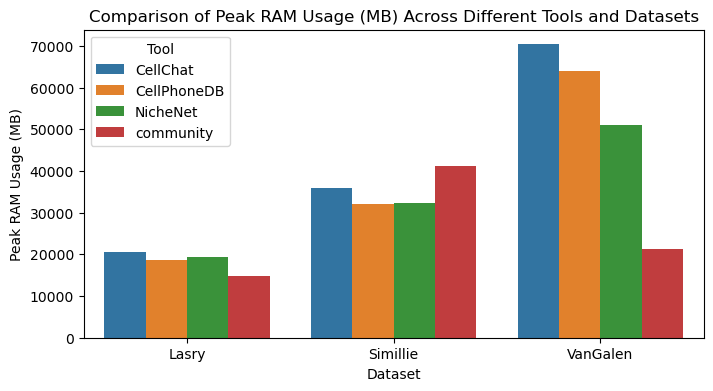

In [55]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Dataset', y='Peak_RAM_MB', hue='Tool', data=df_highest_samples_tool_dataset)
plt.title('Comparison of Peak RAM Usage (MB) Across Different Tools and Datasets')
plt.ylabel('Peak RAM Usage (MB)')
plt.xlabel('Dataset')
plt.show()

In [56]:
df_highest_samples_tool_dataset

,Tool,Dataset,Number_of_case,Number_of_control,Number of Samples,Peak_CPU,Peak_RAM_MB,Peak_VRAM_MB,Elapsed_time(min),Elapsed_hour
31,CellChat,Lasry,7,6,13,1409.5,20687.238,31701.086,18.125083,0.302085
39,CellChat,Simillie,17,11,28,1400.0,35890.410,47970.219,57.016950,0.950282
32,CellChat,VanGalen,24,9,33,1201.5,70393.238,81141.016,61.488333,1.024806
10,CellPhoneDB,Lasry,7,6,13,101.3,18625.184,66596.246,14.061783,0.234363
19,CellPhoneDB,Simillie,17,11,28,101.3,32149.758,50342.027,18.972133,0.316202
15,CellPhoneDB,VanGalen,24,9,33,101.3,63923.457,99220.480,28.502267,0.475038
1,NicheNet,Lasry,7,6,13,101.3,19322.066,32142.621,56.846283,0.947438
9,NicheNet,Simillie,17,11,28,101.4,32338.512,46906.734,215.051000,3.584183
2,NicheNet,VanGalen,24,9,33,102.0,50986.441,63893.312,621.694067,10.361568
20,community,Lasry,7,6,13,101.3,14752.027,29720.023,4.572717,0.076212


In [31]:
# Set font and font size
plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.size'] = 11

In [57]:
df_highest_samples_tool_dataset

,Tool,Dataset,Number_of_case,Number_of_control,Number of Samples,Peak_CPU,Peak_RAM_MB,Peak_VRAM_MB,Elapsed_time(min),Elapsed_hour
31,CellChat,Lasry,7,6,13,1409.5,20687.238,31701.086,18.125083,0.302085
39,CellChat,Simillie,17,11,28,1400.0,35890.410,47970.219,57.016950,0.950282
32,CellChat,VanGalen,24,9,33,1201.5,70393.238,81141.016,61.488333,1.024806
10,CellPhoneDB,Lasry,7,6,13,101.3,18625.184,66596.246,14.061783,0.234363
19,CellPhoneDB,Simillie,17,11,28,101.3,32149.758,50342.027,18.972133,0.316202
15,CellPhoneDB,VanGalen,24,9,33,101.3,63923.457,99220.480,28.502267,0.475038
1,NicheNet,Lasry,7,6,13,101.3,19322.066,32142.621,56.846283,0.947438
9,NicheNet,Simillie,17,11,28,101.4,32338.512,46906.734,215.051000,3.584183
2,NicheNet,VanGalen,24,9,33,102.0,50986.441,63893.312,621.694067,10.361568
20,community,Lasry,7,6,13,101.3,14752.027,29720.023,4.572717,0.076212


In [58]:
df_highest_samples_tool_dataset.replace({'Dataset':{'Lasry':"Lasry", 
                                                    'Simillie':"Simillie",
                                                    'VanGalen':"vanGalen-Oetjen"}}, inplace = True)

In [60]:
custom_order = ['community', 'NicheNet', 'CellPhoneDB', 'CellChat']

In [61]:
custom_dataset_order = ['Simillie', 'Lasry', 'vanGalen-Oetjen']

In [62]:
df_highest_samples_tool_dataset

,Tool,Dataset,Number_of_case,Number_of_control,Number of Samples,Peak_CPU,Peak_RAM_MB,Peak_VRAM_MB,Elapsed_time(min),Elapsed_hour
31,CellChat,Lasry,7,6,13,1409.5,20687.238,31701.086,18.125083,0.302085
39,CellChat,Simillie,17,11,28,1400.0,35890.410,47970.219,57.016950,0.950282
32,CellChat,vanGalen-Oetjen,24,9,33,1201.5,70393.238,81141.016,61.488333,1.024806
10,CellPhoneDB,Lasry,7,6,13,101.3,18625.184,66596.246,14.061783,0.234363
19,CellPhoneDB,Simillie,17,11,28,101.3,32149.758,50342.027,18.972133,0.316202
15,CellPhoneDB,vanGalen-Oetjen,24,9,33,101.3,63923.457,99220.480,28.502267,0.475038
1,NicheNet,Lasry,7,6,13,101.3,19322.066,32142.621,56.846283,0.947438
9,NicheNet,Simillie,17,11,28,101.4,32338.512,46906.734,215.051000,3.584183
2,NicheNet,vanGalen-Oetjen,24,9,33,102.0,50986.441,63893.312,621.694067,10.361568
20,community,Lasry,7,6,13,101.3,14752.027,29720.023,4.572717,0.076212


In [63]:
only_lasry=df_highest_samples_tool_dataset[df_highest_samples_tool_dataset.Dataset=="Lasry"]

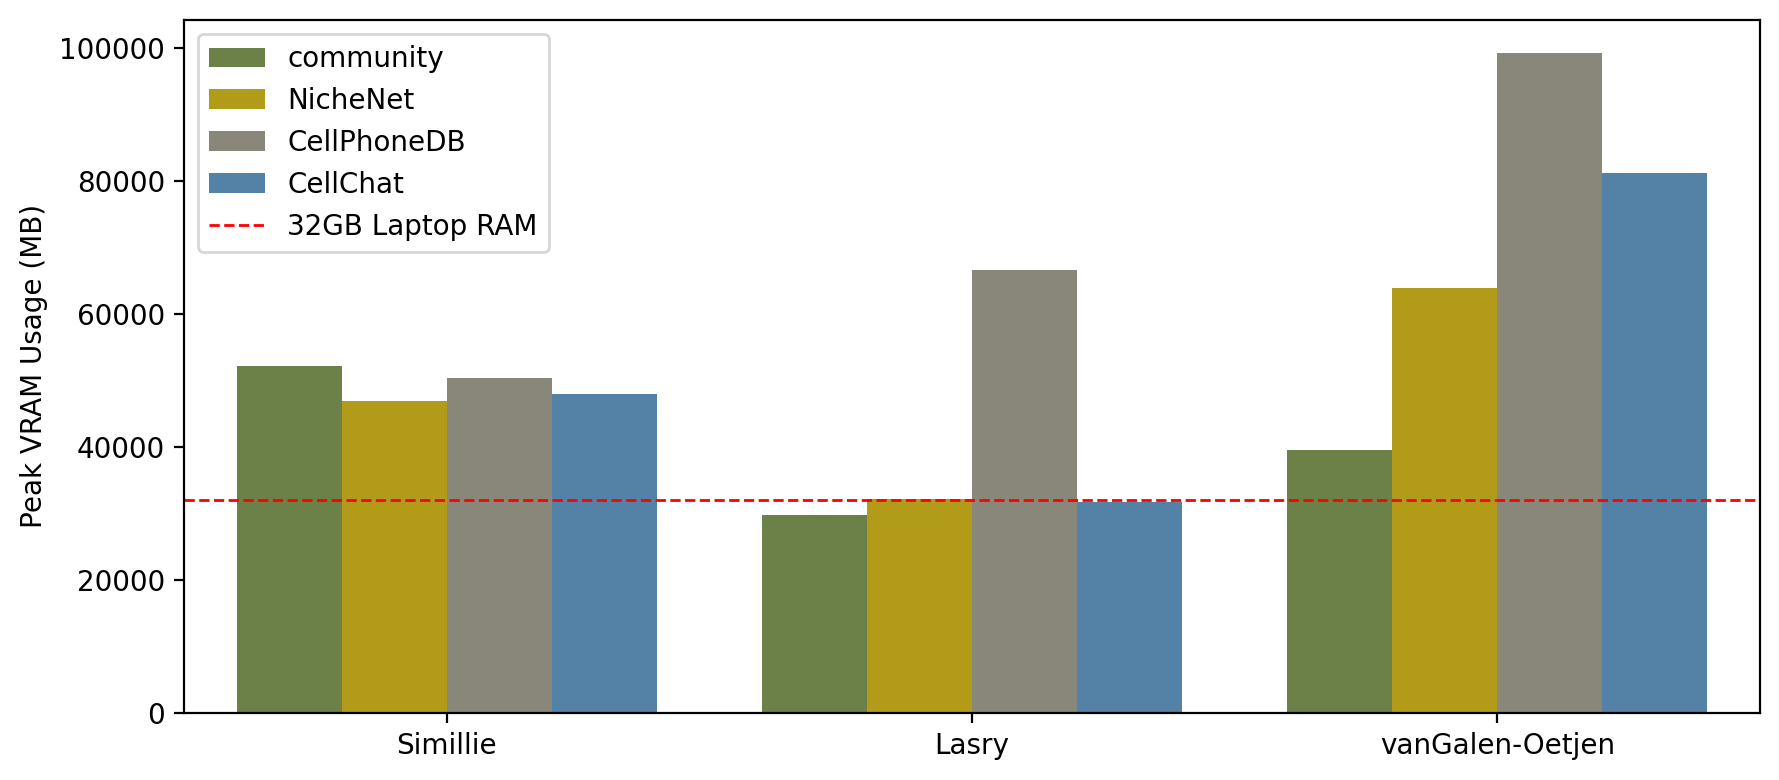

In [64]:
plt.figure(figsize=(9, 4), dpi=200)
sns.barplot(x='Dataset', y='Peak_VRAM_MB', hue='Tool', hue_order=custom_order, order=custom_dataset_order, palette=palette, data=df_highest_samples_tool_dataset)
plt.axhline(32000, color='r', linestyle='--', linewidth=1, label='32GB Laptop RAM')
# Add custom legend
plt.legend()

plt.xlabel('')
plt.ylabel('Peak VRAM Usage (MB)')
plt.tight_layout()
plt.show()


In [31]:
peak_values.to_csv("peak_values_table.csv")

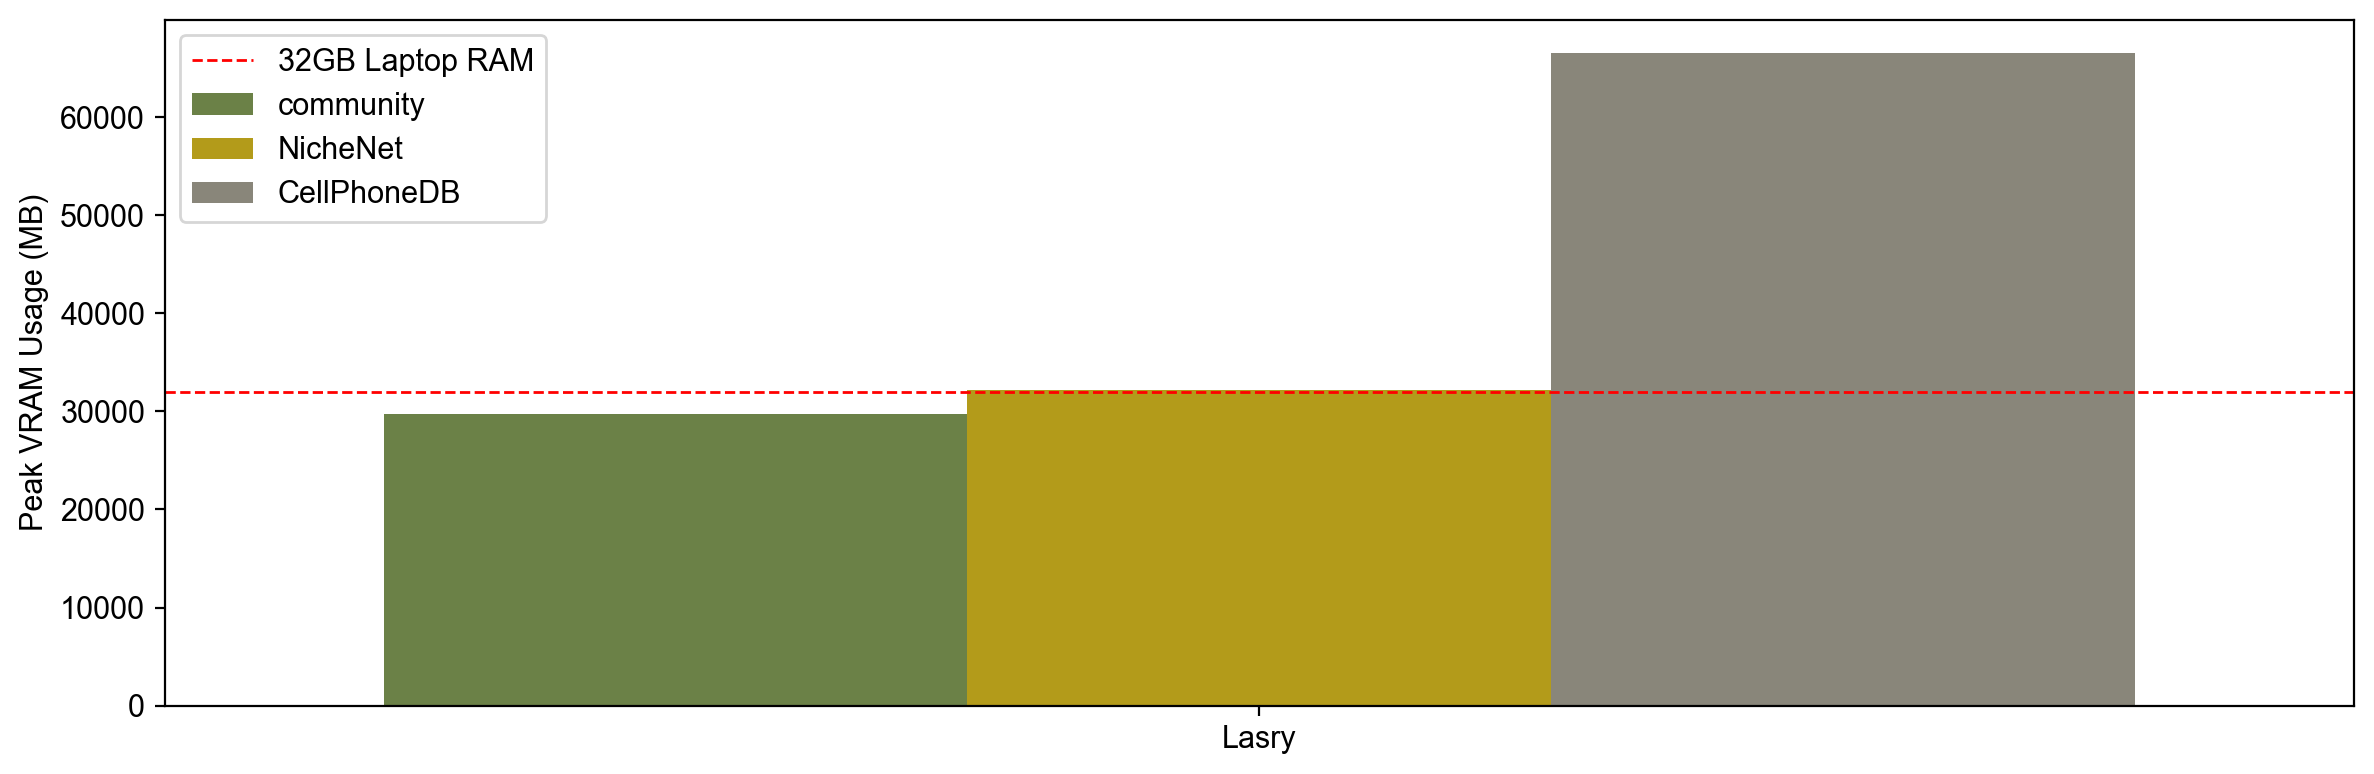

In [49]:
plt.figure(figsize=(12, 4), dpi=200)
sns.barplot(x='Dataset', y='Peak_VRAM_MB', hue='Tool', hue_order=custom_order, palette=palette, data=only_lasry)
plt.axhline(32000, color='r', linestyle='--', linewidth=1, label='32GB Laptop RAM')
# Add custom legend
plt.legend()

plt.xlabel('')
plt.ylabel('Peak VRAM Usage (MB)')
plt.tight_layout()
plt.show()


In [41]:
custom_dataset_order

['community', 'NicheNet', 'CellPhoneDB']